### Some simple problems

In [56]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
torch.__version__


'2.4.0+cpu'

### Data creation

In [9]:
w = 0.7
b = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(1)
y = w * X + b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [17]:
X.shape

torch.Size([50, 1])

### Train and test

In [27]:
Xtv, Xts, ytv, yts = train_test_split(X, y, test_size= 0.2)
Xtv.shape, Xts.shape, ytv.shape, yts.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [28]:
def plot_predictions(train_data=Xtv, 
                     train_labels=ytv, 
                     test_data=Xts, 
                     test_labels=yts, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

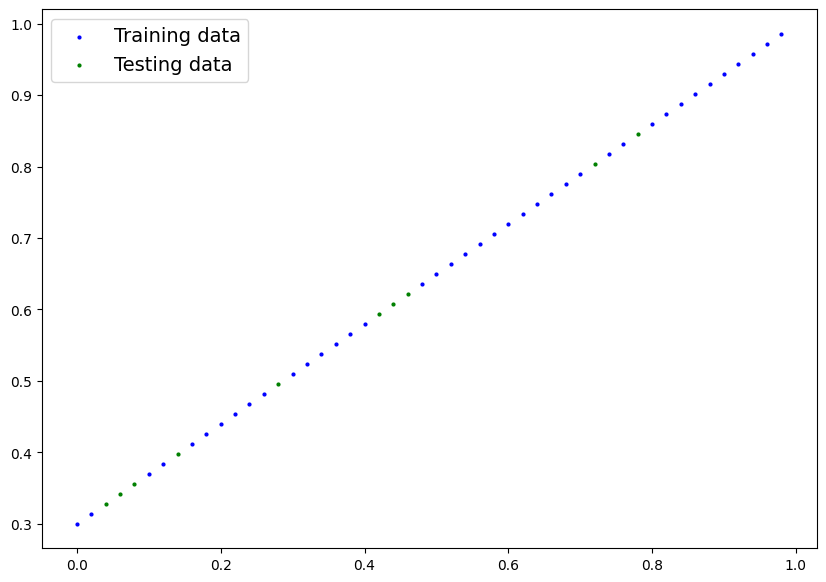

In [29]:
plot_predictions()

In [42]:
class LinearRegression(nn.Module): #Inheritance of the nn module
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        #We create a simple linear regresion using weight: w and bias: b
        #The first parameters are random generated, and we stablish that they are float and we 
        #going to optimized with a gradient desent ecuation
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias #This is like a linear regresion ecuation, we are going to change this 
            #values when the model is training 

        

In [43]:
torch.manual_seed(23)

model = LinearRegression()

list(model.parameters())

[Parameter containing:
 tensor([0.4283], requires_grad=True),
 Parameter containing:
 tensor([0.2889], requires_grad=True)]

Its just random numbers

In [44]:
with torch.inference_mode(): #Remember to use the inference mode to make it faster
    y_preds = model(Xts)

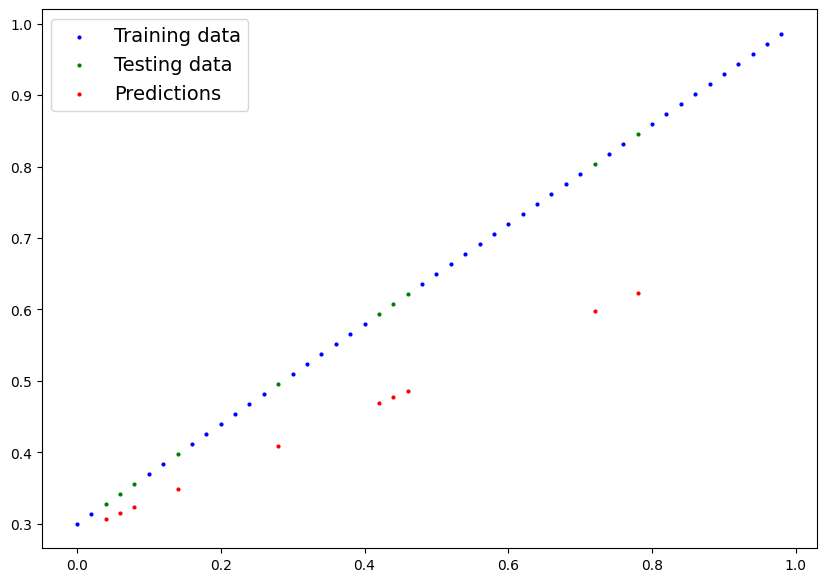

In [45]:
plot_predictions(predictions=y_preds)

It is doing his best :c

### The lost function

In [57]:
loss = nn.MSELoss() #This is the MSE refer to documentation to try other loss functions

optmizer = torch.optim.SGD(params=model.parameters(), lr=0.01) #The learning rate and in this case we are going to use a 
#stochastic gradient descent algorith 

AttributeError: module 'torch' has no attribute 'version'

### Testing loop

In [49]:
epochs = 200

for epoch in range(epochs):
    model.train()
    y_pred = model(Xtv)
    train_loss = loss(y_pred, ytv)
    optmizer.zero_grad()
    loss.backward()
    optmizer.step()
    model.eval()
    with torch.inference_mode():
        yts_pred = model(Xts)
        test_loss = loss(yts_pred, yts)
        if epoch % 20 == 0:
            print(f"Epoch {epoch} | MSE train {train_loss} | MSE test {test_loss}")


NameError: name 'optmizer' is not defined